##  All figures

This code is largely based on the implementation provided by Enge et al. (2021), available at https://osf.io/34ry2/. We are deeply grateful for their dedication to open research.

> Enge, A., Abdel Rahman, R., & Skeide, M. A. (2021). A meta-analysis of fMRI studies of semantic cognition in children. NeuroImage, 241, 118436. https://doi.org/10.1016/j.neuroimage.2021.118436

In [1]:
# Import necessary modules
from os import makedirs, path
from atlasreader import get_statmap_info
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
from nilearn import image, plotting, reporting
from scipy import stats
from scipy.stats import pearsonr
import os, fnmatch
from glob import glob
from pathlib import Path
import re

# print the current working directory
# print(os.getcwd())

The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



/Users/ss/miniconda3/lib/python3.12/site-packages/nilearn/plotting/displays/_slicers.py:313: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


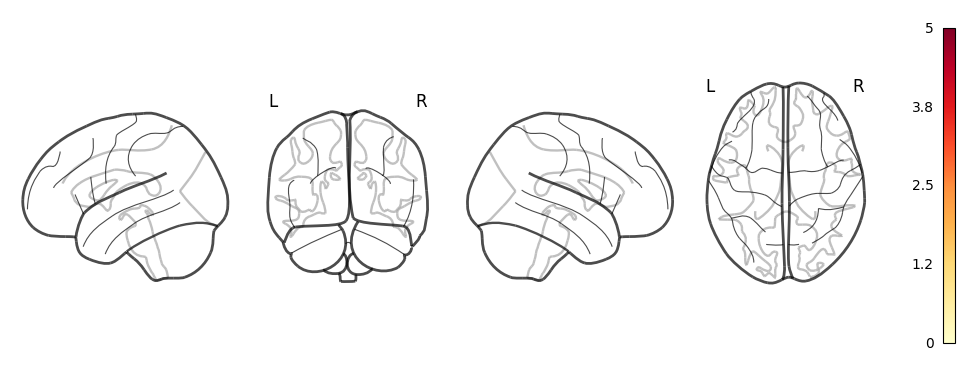

In [2]:
# Define the file path for the Z-thresholded image of the healthy control group
img_supply = '../Output/1_ALE/control_minus_patient_plus_only_self_z_size_level_thresh.nii.gz'

# Generate the glass brain visualization
fig0 = plotting.plot_glass_brain(img_supply, 
                                 display_mode="lyrz", 
                                 cmap="YlOrRd",
                                 threshold=0,
                                #  vmin=0.001, 
                                 vmax=5,
                                 colorbar=True)

## Figures - ALE results

#### Figure 1. Single ALE Analysis: Healthy Controls (Self > Other Contrast)


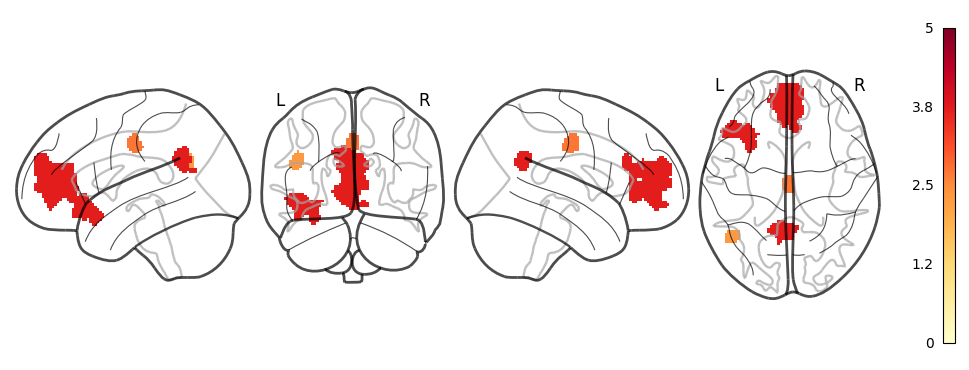

In [ ]:
# Define the file path for the Z-thresholded image of the healthy control group
img_controls = '../Output/1_ALE/control_all_z_size_level_thresh.nii.gz'

# Generate the glass brain visualization
fig1 = plotting.plot_glass_brain(img_controls, 
                                 display_mode="lyrz", 
                                 cmap="YlOrRd",
                                 threshold=0,
                                #  vmin=0.001, 
                                 vmax=5,
                                 colorbar=True)

# Save the visualization in multiple formats
plt.savefig('../Output/5_Figures/ale_controls.svg')  
plt.savefig('../Output/5_Figures/ale_controls.pdf')  
plt.savefig('../Output/5_Figures/ale_controls.png')

#### Figure 2. Single ALE Analysis: Psychiatric Patients (Self > Other Contrast)

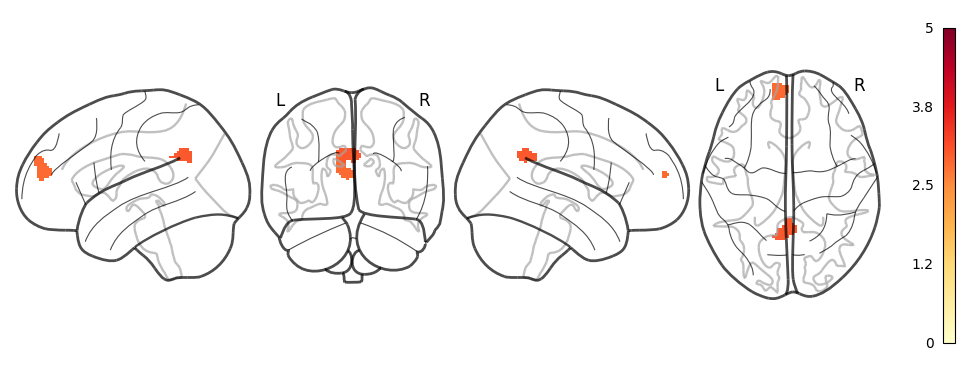

In [3]:
# Define the file path for the Z-thresholded image of the psychiatric patient group
img_patients = '../Output/1_ALE/patient_z_size_level_thresh.nii.gz'

# Generate the glass brain visualization
fig2 = plotting.plot_glass_brain(img_patients, 
                                 display_mode="lyrz", 
                                 cmap="YlOrRd",
                                 threshold=0,
                                #  vmin=0.001, 
                                 vmax=5,
                                 colorbar=True)

# Save the visualization in multiple formats
plt.savefig('../Output/5_Figures/ale_patients.svg')  
plt.savefig('../Output/5_Figures/ale_patients.pdf')  
plt.savefig('../Output/5_Figures/ale_patients.png')

#### Figure 3. Single ALE Analysis: Psychiatric Patients Minus Healthy Controls (Self > Other Contrast)


/Users/ss/miniconda3/lib/python3.12/site-packages/nilearn/plotting/displays/_slicers.py:313: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


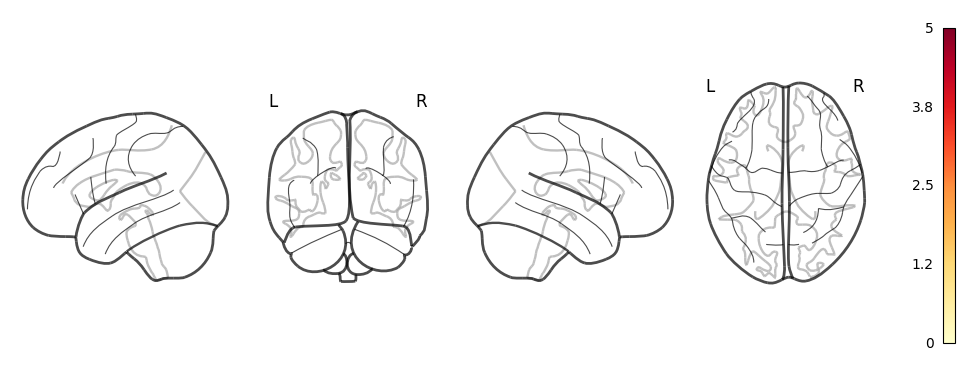

In [4]:
# Define the file path for the Z-thresholded image of the group comparison (control minus patient)
img_patient_minus_control = '../Output/1_ALE/patient_minus_control_z_size_level_thresh.nii.gz'

# Generate the glass brain visualization
fig3 = plotting.plot_glass_brain(img_patient_minus_control, 
                                 display_mode="lyrz", 
                                 cmap="YlOrRd",
                                 threshold=0,
                                #  vmin=0.001, 
                                 vmax=5,
                                 colorbar=True)

# Save the visualization in multiple formats
plt.savefig('../Output/5_Figures/ale_patient_minus_control.svg')  
plt.savefig('../Output/5_Figures/ale_patient_minus_control.pdf')  
plt.savefig('../Output/5_Figures/ale_patient_minus_control.png')

#### Figure 4. Single ALE Analysis: Healthy Controls Minus Psychiatric Patients (Self > Other Contrast)

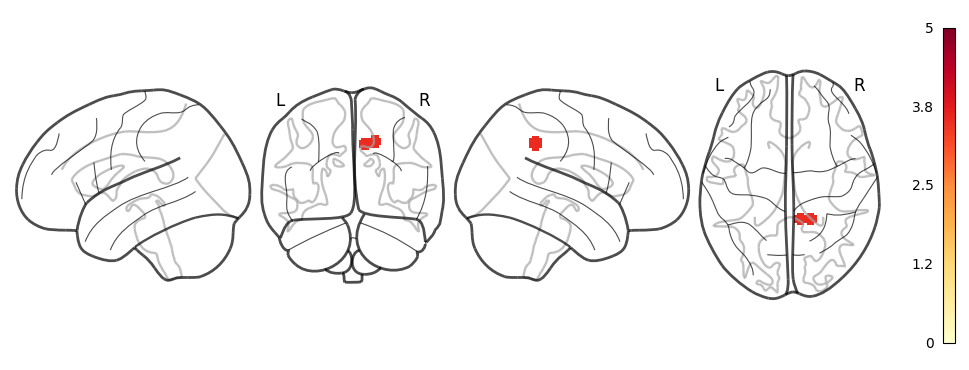

In [5]:
# Define the file path for the Z-thresholded image of the group comparison (control minus patient)
img_control_minus_patient = '../Output/1_ALE/control_minus_patient_z_size_level_thresh.nii.gz'

# Generate the glass brain visualization
fig3 = plotting.plot_glass_brain(img_control_minus_patient, 
                                 display_mode="lyrz", 
                                 cmap="YlOrRd",
                                 threshold=0,
                                #  vmin=0.001, 
                                 vmax=5,
                                 colorbar=True)

# Save the visualization in multiple formats
plt.savefig('../Output/5_Figures/ale_control_minus_patient.svg')  
plt.savefig('../Output/5_Figures/ale_control_minus_patient.pdf')  
plt.savefig('../Output/5_Figures/ale_control_minus_patient.png')

#### Figure 5. Subtraction Analysis:  (Self > Other Contrast)

In [ ]:
# Define the file path for the Z-thresholded image
img_sub = image.load_img("../Output/2_Subtraction/Control_all_minus_patient_z_thresh.nii.gz")

# Generate the glass brain visualization
fig7 = plotting.plot_glass_brain(img_sub,
                        display_mode="lyrz",      
                        cmap="YlOrRd",
                        threshold=0,                
                        vmax=5,
                        colorbar=True)

# Save the visualization in multiple formats
plt.savefig('../Output/5_Figures/ale_subtraction.svg')  
plt.savefig('../Output/5_Figures/ale_subtraction.pdf')  
plt.savefig('../Output/5_Figures/ale_subtraction.png')


In [8]:
# Compute seperate difference maps for children > adults and adults > children
from nibabel import save

img_sub = image.load_img("../Output/2_Subtraction/Control_all_minus_patient_z_thresh.nii.gz")
img_controls_gt_patients = image.math_img("np.where(img > 0, img, 0)", img=img_sub)
img_patients_gt_controls = image.math_img("np.where(img < 0, img * -1, 0)", img=img_sub)
_ = save(img_controls_gt_patients, "../Output/2_Subtraction/controls_greater_patients_z_thresh.nii.gz")
_ = save(img_patients_gt_controls, "../Output/2_Subtraction/patients_greater_controls_z_thresh.nii.gz")


#### Figure 6. Conjunction Analysis:  (Self > Other Contrast)

In [9]:
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_controls_z = image.load_img("../Output/1_ALE/control_all_z_thresh.nii.gz")
img_patients_z = image.load_img("../Output/1_ALE/patient_z_thresh.nii.gz")
img_conj_z = image.math_img(formula, img1=img_controls_z, img2=img_patients_z)
_ = save(img_conj_z, "../Output/5_Figures/controls_conj_patients_z.nii.gz")

# Compute conjunction ALE map (= minimum voxel-wise ALE value across both groups)
img_controls_ale = image.load_img("../Output/1_ALE/control_all_stat_size_thresh.nii.gz")
img_patients_ale = image.load_img("../Output/1_ALE/patient_stat_size_thresh.nii.gz")
img_conj_ale = image.math_img(formula, img1=img_controls_ale, img2=img_patients_ale)
_ = save(img_conj_ale, "../Output/5_Figures/controls_conj_patients_ale.nii.gz")



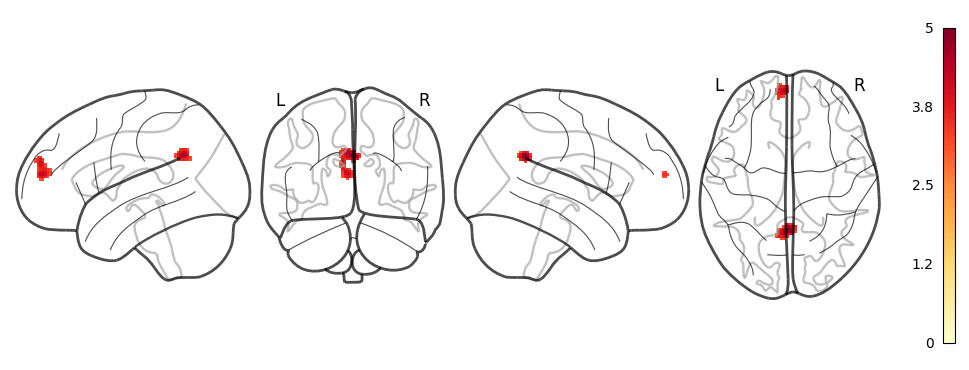

In [12]:
# Glass brain for conjunction
fig_conj = plotting.plot_glass_brain(
    img_conj_z,
    display_mode="lyrz",
    cmap="YlOrRd",
    colorbar=True,
    threshold=0,
    vmax=5,
)

# Save the visualization in multiple formats
plt.savefig('../Output/5_Figures/controls_conj_patients.svg')  
plt.savefig('../Output/5_Figures/controls_conj_patients.pdf')  
plt.savefig('../Output/5_Figures/controls_conj_patients.png')

#### Figure 7. Single Analysis: Schizophrenia(SZ) patients (Self > Other Contrast)

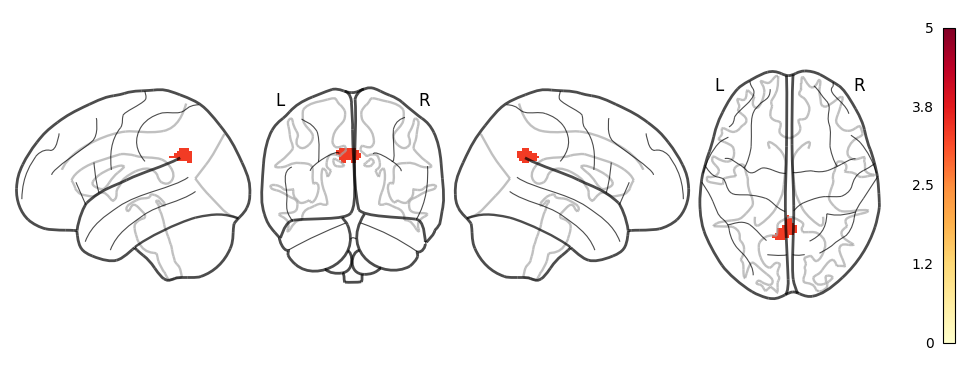

In [13]:
# Define the file path for the Z-thresholded image
img_sz = '../Output/1_ALE/SZ_z_size_level_thresh.nii.gz'

# Generate the glass brain visualization for the control group using the ALE-thresholded image
fig7 = plotting.plot_glass_brain(img_sz, 
                                 display_mode="lyrz", 
                                 cmap="YlOrRd",
                                 threshold=0,
                                #  vmin=0.001, 
                                 vmax=5,
                                 colorbar=True)

# # Save the visualization in multiple formats
plt.savefig('../Output/5_Figures/ale_sz_patient.svg')  
plt.savefig('../Output/5_Figures/ale_sz_patient.pdf')  
plt.savefig('../Output/5_Figures/ale_sz_patient.png')

#### GingerALE software ALE result:
#### Figure 8. Psychiatric Patients Minus Healthy Controls (Self > Other Contrast)


/Users/ss/miniconda3/lib/python3.12/site-packages/nilearn/plotting/displays/_slicers.py:313: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


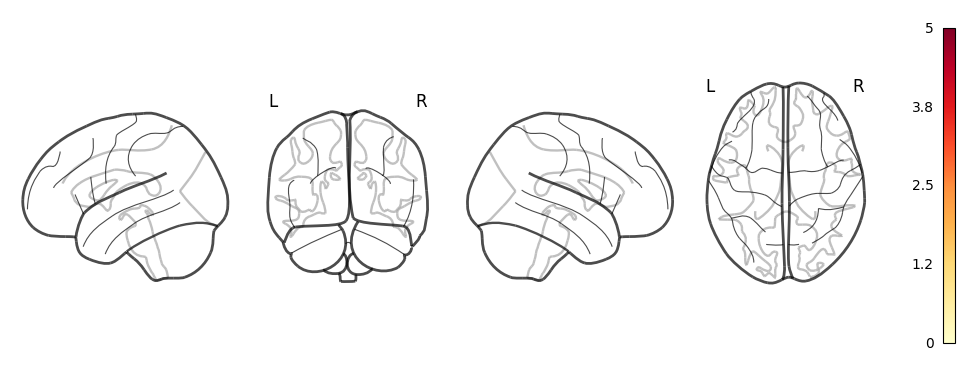

In [17]:
# Define the file path for the Z-thresholded image
img_gingerale = "../Output/GingerALE/patient_minus_control_C05_10k_ALE.nii"

# Generate the glass brain visualization
fig8 = plotting.plot_glass_brain(img_gingerale, 
                                 display_mode="lyrz",
                                 cmap="YlOrRd", 
                                 threshold=0,
                                #  vmin=0,
                                 vmax=5,
                                 colorbar=True)

# Save the visualization in multiple formats
plt.savefig('../Output/5_Figures/gingerale.svg')  
plt.savefig('../Output/5_Figures/gingerale.pdf')  
plt.savefig('../Output/5_Figures/gingerale.png')

#### Figures - All FSN Results

#### Figure 9. FSN Results: Psychiatric Patients （Self > Other Contrast）

/Users/ss/miniconda3/lib/python3.12/site-packages/nilearn/image/image.py:1160: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


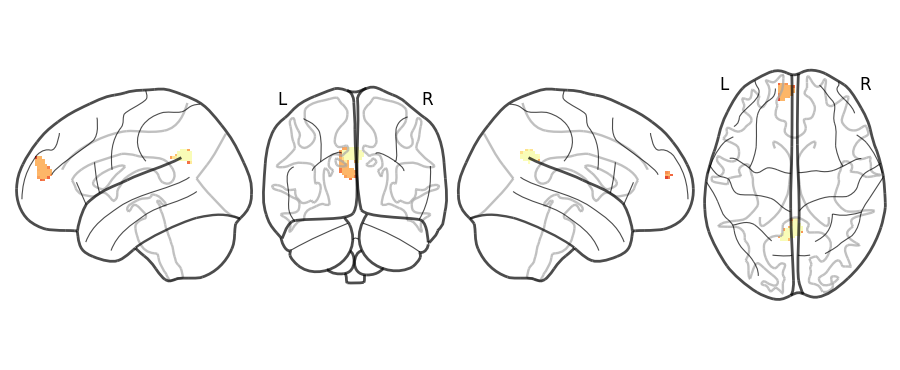

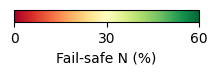

In [2]:
vmin, vmax = 0, 60 
img_task = image.load_img("../Output/1_ALE/patient_z_thresh.nii")
img_mask = image.math_img("np.where(img > 0, 100, 0)", img=img_task)  
img_fsn = image.load_img("../Output/3_FSN/patient/patient_mean_fsn.nii.gz") 

# Calculate the FSN percentage
n_studies = 12
formula = f"img1 * img2 / {n_studies}"
img_perc = image.math_img(formula=formula, img1=img_fsn, img2=img_mask)

formula = "img1 * img2 / " + str(n_studies)
img_perc = image.math_img(formula=formula, img1=img_fsn, img2=img_mask)
p = plotting.plot_glass_brain(None, display_mode="lyrz")
p.add_overlay(img_perc, cmap="RdYlGn", vmin=vmin, vmax=vmax)

# Add colorbar
fig9 = plt.figure(figsize=(12, 6)) 
gs = fig9.add_gridspec(110, 90)  
ax_cbar = fig9.add_subplot(gs[100:103, 36:54])  
cmap = plt.get_cmap("RdYlGn")
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

mpl.colorbar.ColorbarBase(
    ax_cbar,
    cmap=cmap,
    norm=norm,
    orientation="horizontal",
    ticks=[vmin, vmax, (vmin + vmax) / 2],
    label="Fail-safe N (%)",
)

# Save the visualization in multiple formats
plt.savefig('../Output/5_Figures/fsn_patients.svg')  
plt.savefig('../Output/5_Figures/fsn_patients.pdf')  
plt.savefig('../Output/5_Figures/fsn_patients.png')

#### Figure 10. FSN Results: Healthy Controls Minus Psychiatric Patients (Self > Other Contrast)

/Users/ss/miniconda3/lib/python3.12/site-packages/nilearn/image/image.py:1160: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


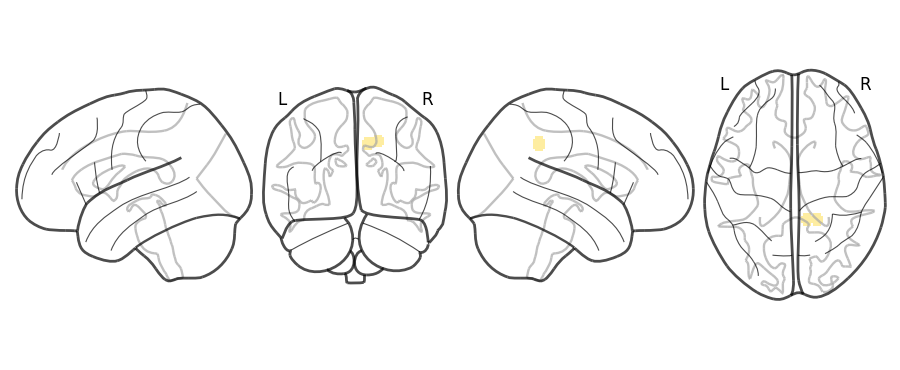

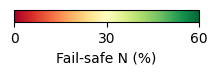

In [3]:
vmin, vmax = 0, 60 
img_task = image.load_img("../Output/1_ALE/control_minus_patient_z_thresh.nii.gz")
img_mask = image.math_img("np.where(img > 0, 100, 0)", img=img_task)  
img_fsn = image.load_img("../Output/3_FSN/control_minus_patient/control_minus_patient_mean_fsn.nii.gz") 

# Calculate the FSN percentage
n_studies = 18
formula = f"img1 * img2 / {n_studies}"
img_perc = image.math_img(formula=formula, img1=img_fsn, img2=img_mask)

formula = "img1 * img2 / " + str(n_studies)
img_perc = image.math_img(formula=formula, img1=img_fsn, img2=img_mask)
p = plotting.plot_glass_brain(None, display_mode="lyrz")
p.add_overlay(img_perc, cmap="RdYlGn", vmin=vmin, vmax=vmax)

# Add colorbar
fig10 = plt.figure(figsize=(12, 6)) 
gs = fig10.add_gridspec(110, 90)  
ax_cbar = fig10.add_subplot(gs[100:103, 36:54])  
cmap = plt.get_cmap("RdYlGn")
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

mpl.colorbar.ColorbarBase(
    ax_cbar,
    cmap=cmap,
    norm=norm,
    orientation="horizontal",
    ticks=[vmin, vmax, (vmin + vmax) / 2],
    label="Fail-safe N (%)",
)

# Save the visualization in multiple formats
plt.savefig('../Output/5_Figures/fsn_hc_minus_patients.svg')  
plt.savefig('../Output/5_Figures/fsn_hc_minus_patients.pdf')  
plt.savefig('../Output/5_Figures/fsn_hc_minus_patients.png')

#### Figure 11. FSN Results: Schizophrenia(SZ) patients (Self > Other Contrast)

/Users/ss/miniconda3/lib/python3.12/site-packages/nilearn/image/image.py:1160: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


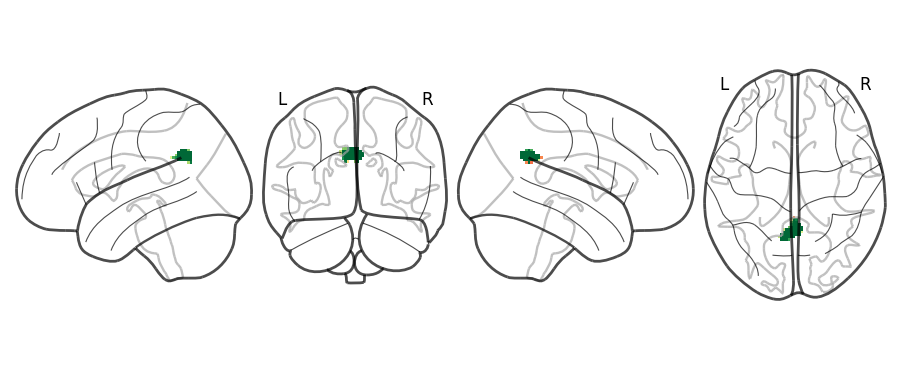

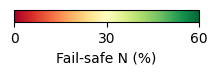

In [ ]:
vmin, vmax = 0, 60 
img_task = image.load_img("../Output/1_ALE/SZ_z_thresh.nii.gz")
img_mask = image.math_img("np.where(img > 0, 100, 0)", img=img_task)  
img_fsn = image.load_img("../Output/3_FSN/SZ/SZ_mean_fsn.nii.gz") 

# Calculate the FSN percentage
n_studies =9
formula = f"img1 * img2 / {n_studies}"
img_perc = image.math_img(formula=formula, img1=img_fsn, img2=img_mask)

formula = "img1 * img2 / " + str(n_studies)
img_perc = image.math_img(formula=formula, img1=img_fsn, img2=img_mask)
p = plotting.plot_glass_brain(None, display_mode="lyrz")
p.add_overlay(img_perc, cmap="RdYlGn", vmin=vmin, vmax=vmax)

# Add colorbar
fig10 = plt.figure(figsize=(12, 6)) 
gs = fig10.add_gridspec(110, 90)  
ax_cbar = fig10.add_subplot(gs[100:103, 36:54])  
cmap = plt.get_cmap("RdYlGn")
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

mpl.colorbar.ColorbarBase(
    ax_cbar,
    cmap=cmap,
    norm=norm,
    orientation="horizontal",
    ticks=[vmin, vmax, (vmin + vmax) / 2],
    label="Fail-safe N (%)",
)

# Save the visualization in multiple formats
plt.savefig('../Output/5_Figures/fsn_hc_minus_patients.svg')  
plt.savefig('../Output/5_Figures/fsn_hc_minus_patients.pdf')  
plt.savefig('../Output/5_Figures/fsn_hc_minus_patients.png')